# Importing Libraries

In [ ]:
# Importing the importables .
import numpy as np
import pandas as pd
import os
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from google.colab import drive
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install mglearn

# Pages 30 bis 39

## Forge

(26, 2)


Text(0, 0.5, 'Second feature')

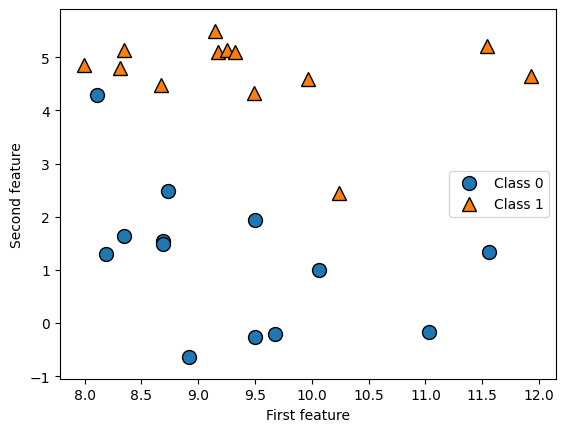

In [ ]:
''' Using the make forge dataset, the plot gets plotted and the shape of the data gets extracted. '''

X, y = mglearn.datasets.make_forge()
print(X.shape)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=5)
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Wave

(50, 1)


Text(0, 0.5, 'Target')

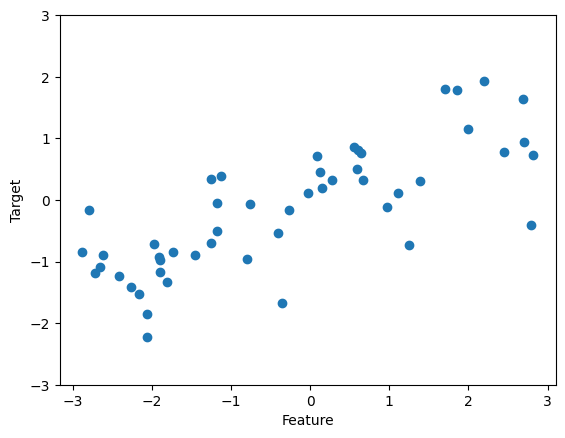

In [ ]:
''' Using the make wave dataset, the plot gets plotted and the shape of the data gets extracted. '''

X, y = mglearn.datasets.make_wave(n_samples=50)
print(X.shape)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## Breast cancer

In [ ]:
''' Using the breast cancer dataset, data from the dataset gets extracted. first
 the keys,then shape,target names, target amounts, feature names and basics . '''

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)
print(cancer.target_names)
# bitwise counting of each class
print(np.bincount(cancer.target))
# bitwise counting each class while representing the class name and type
print(list(zip(cancer.target_names, np.bincount(cancer.target))))
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
['malignant' 'benign']
[212 357]
[(np.str_('malignant'), np.int64(212)), (np.str_('benign'), np.int64(357))]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Boston Housing

In [ ]:
''' The Boston housing prices dataset has been removed from scikit-learn since
    version 1.2.'''

' The Boston housing prices dataset has been removed from scikit-learn since\n    version 1.2.'

## Knn

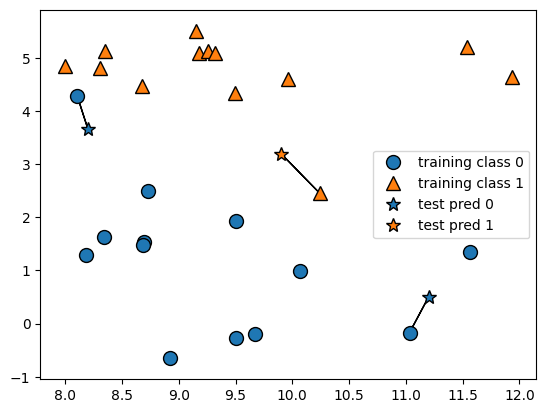

In [ ]:
# Using the make forge dataset, the representation of a 1 neighbor knn clasifier.
mglearn.plots.plot_knn_classification(n_neighbors=1)

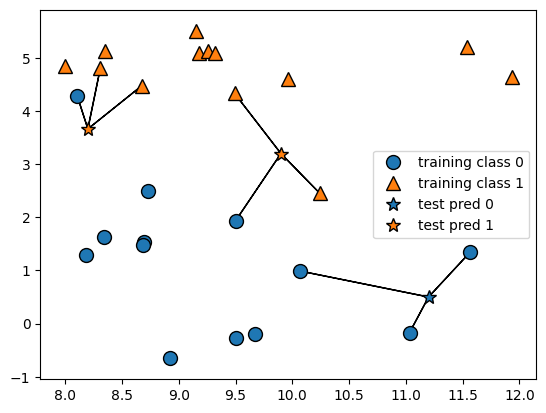

In [ ]:
# Using the make forge dataset, the representation of a 3 neighbor knn clasifier.
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
''' Using the make forge, knn with 3 neighbors gets implemented and tested.
    The accuracy also gets printed. '''

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


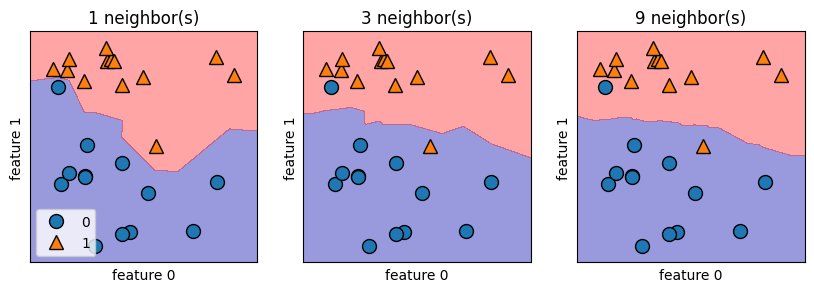

In [ ]:
''' The difference bitween 1,3 & 9 neighbor knn is being represented. Using
    subplot. The for loop plots the three sublots using k = 1,3,9 . '''


fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
  axes[0].legend(loc=3)

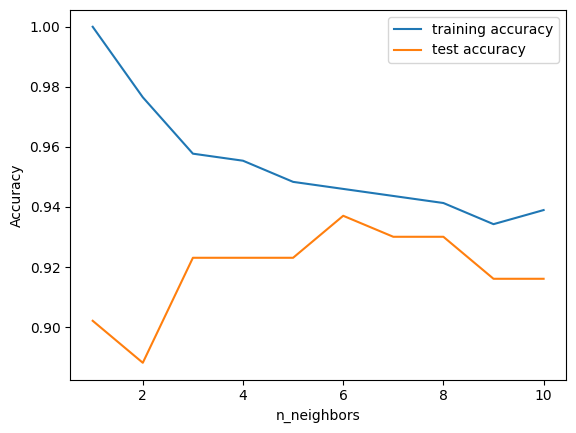

In [ ]:
''' Now the difference of acuuracy in knn for 1 to 10 neighbors is being
    represented in a single plot. The for loop goes from 1 to 10 neighbors,
    training ,testing and aquiering the accuracy in an array.  '''

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Pages 140 bis 155.

## PCA

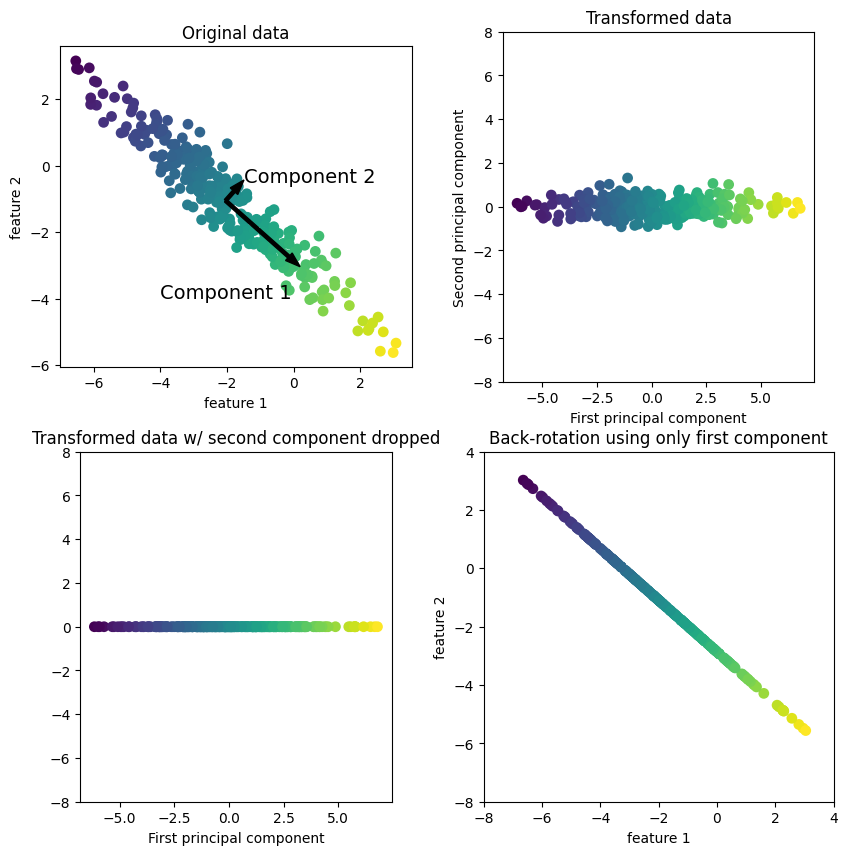

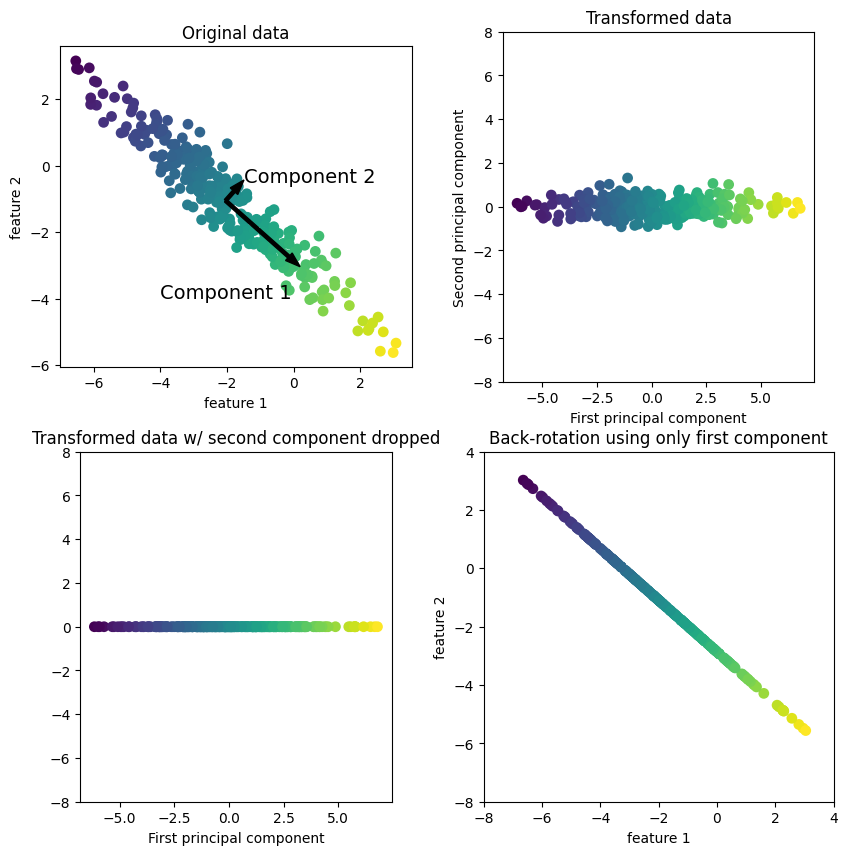

In [ ]:
''' PCA is being repressented. First plot is the raw data, while represinting
    component 1 and 2 with  maximum  and minimum variance, second plots the data
    while rotated in an a way that component 1 is aligned with the x axis. third
    implements PCA and the fourth rerotates the data again and the mean being
    readded. '''

mglearn.plots.plot_pca_illustration()
mglearn.plots.plot_pca_illustration()

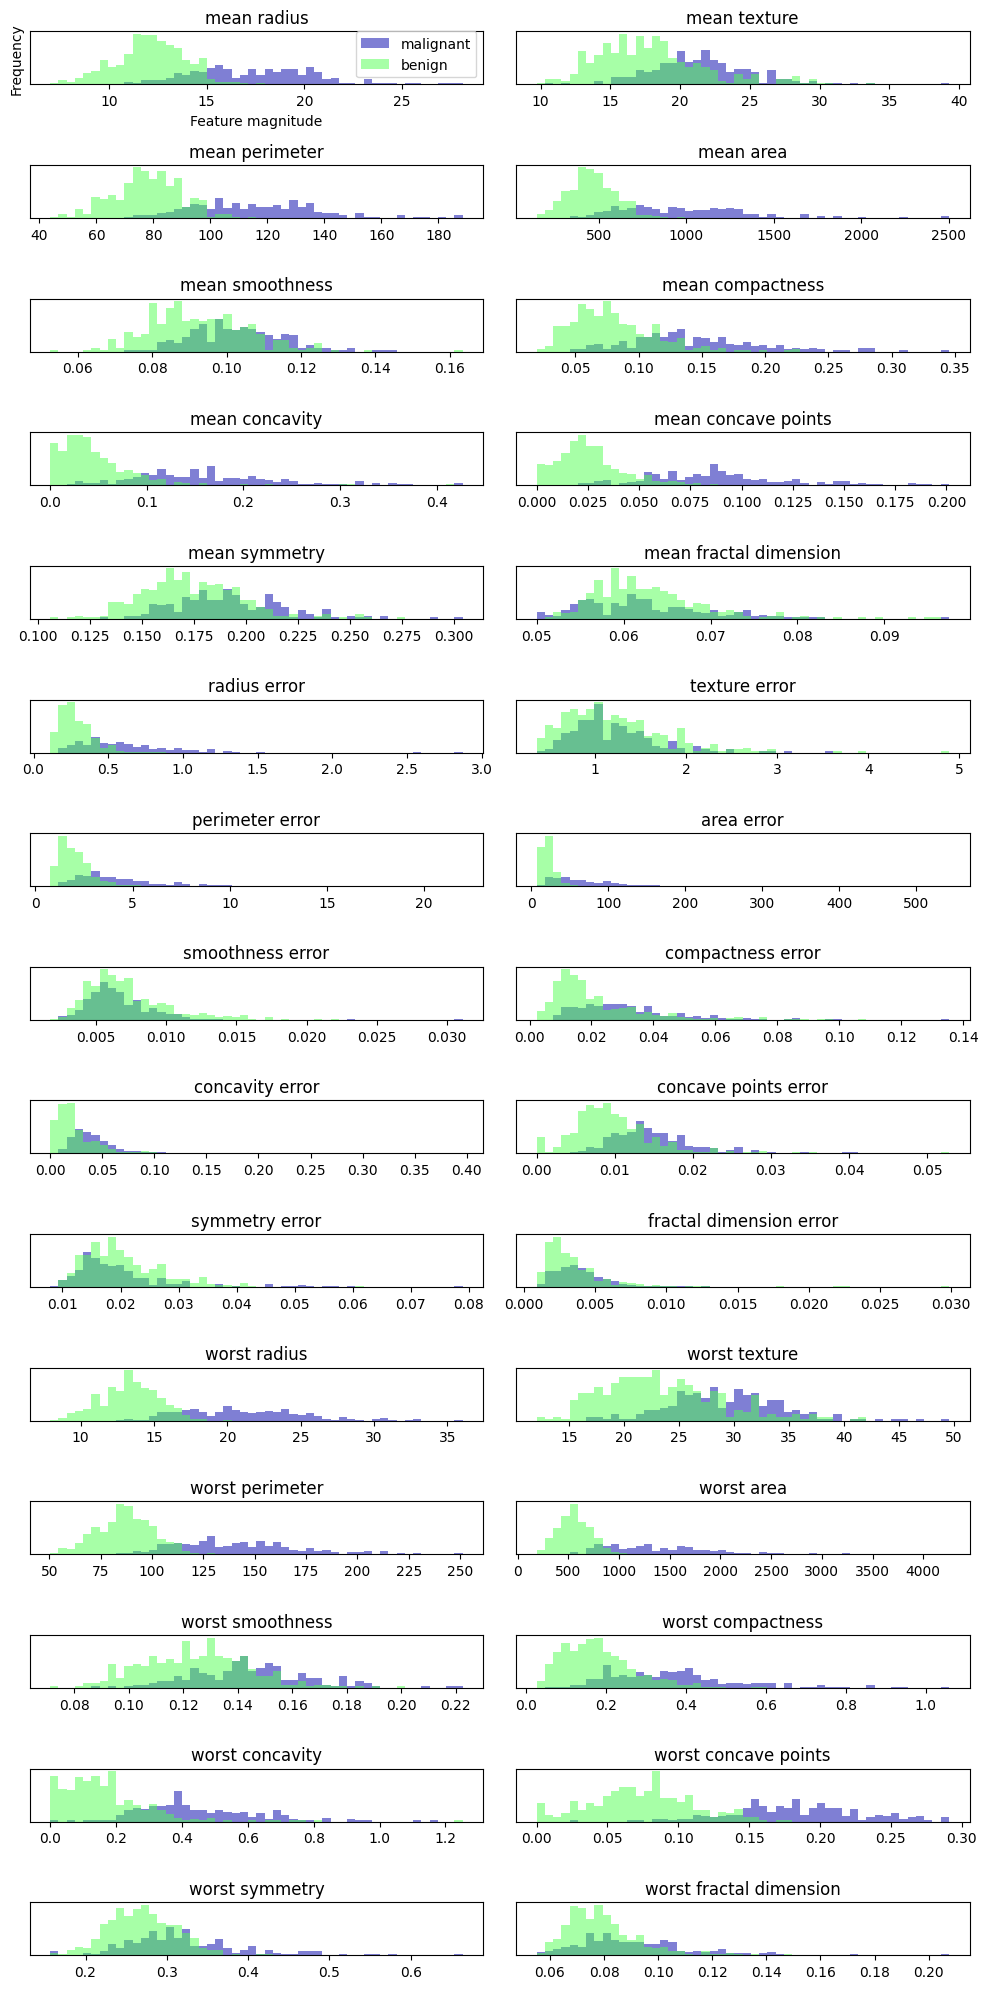

In [ ]:
''' Visualization has been done by histogram instead of scatter-plot cauese of
    the fratures. The hists have been plotted ussing subplots. For each of the
    30 features a hist containing 50 bins is plotted '''


fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [ ]:
''' Scaling is being done for PCA, making the mean 0 and scale from -1 to 1. '''

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [ ]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

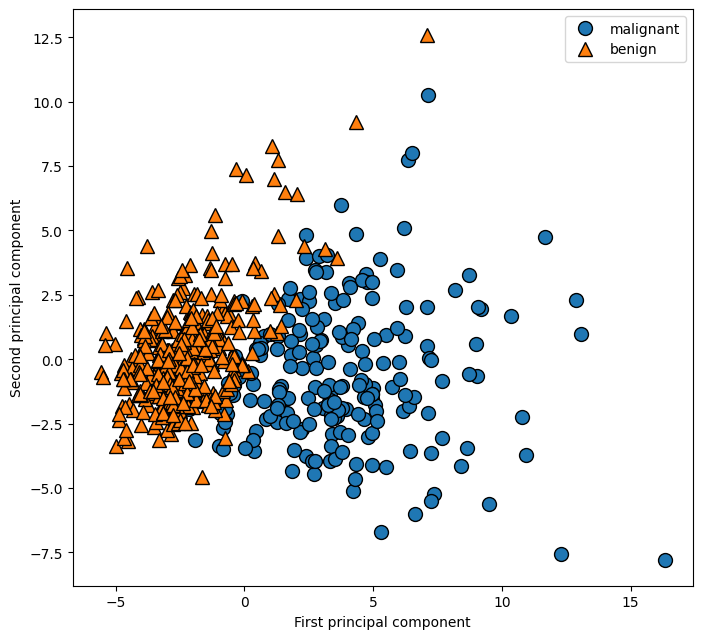

In [ ]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [ ]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [ ]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

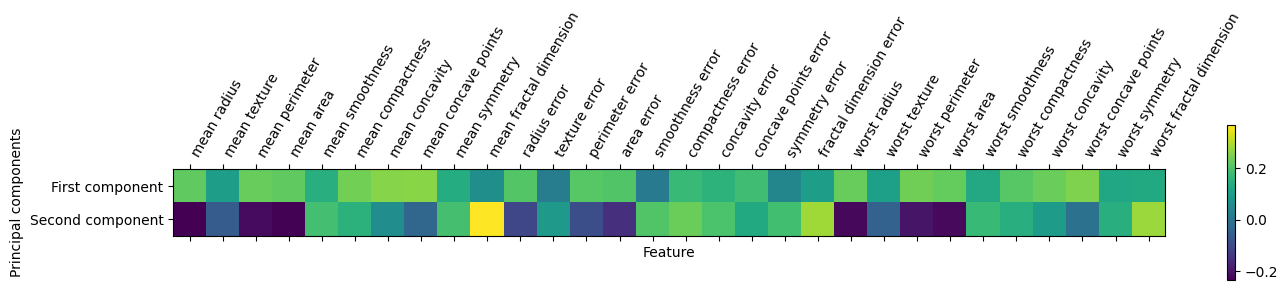

In [ ]:
''' Visualizing the coefficients using a heat map. '''

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

##  Eigenfaces

image_shape: (87, 65)


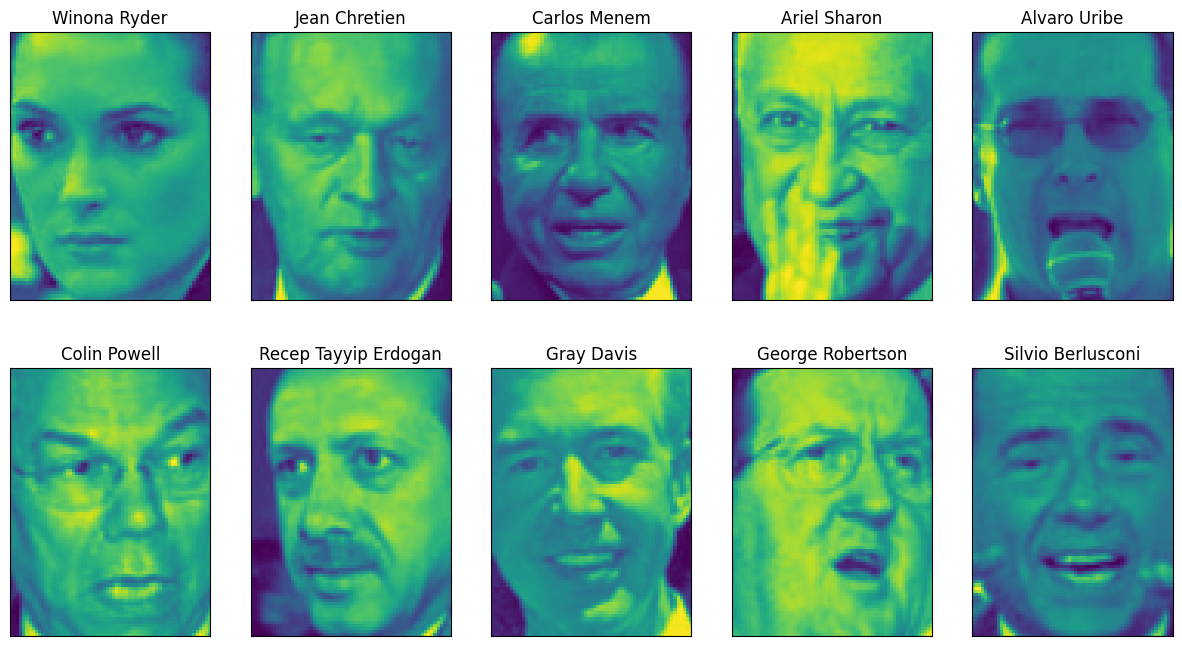

In [ ]:
''' The code loads the Labeled Faces in the Wild (LFW) dataset using
    fetch_lfw_people(), selecting people with at least 20 images and resizing
    them by 0.7. It retrieves the shape of the first image in the dataset and
    prints it. A 2-row, 5-column subplot is created to display 10 images, with
    xticks and yticks removed for clarity. Each subplot displays an image from
    the dataset with its corresponding person's name as the title.'''

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print("image_shape: {}".format(image_shape))
fix, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])

In [ ]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [ ]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
 print("{0:25} {1:3}".format(name, count), end='   ')
 if (i + 1) % 3 == 0:
  print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

The code creates a boolean mask initialized to `False`, with the same shape as `people.target`. It then iterates over unique target labels, setting `True` for up to 50 occurrences per person to limit the dataset size. The filtered data (`X_people`) and corresponding labels (`y_people`) are extracted using this mask. Finally, the grayscale pixel values of `X_people` are scaled from the range [0, 255] to [0, 1] for better numerical stability.

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
 X_people = people.data[mask]
 y_people = people.target[mask]
 # scale the grayscale values to be between 0 and 1
 # instead of 0 and 255 for better numeric stability
 X_people = X_people / 255.

In [ ]:
 # split the data into training and test sets
 X_train, X_test, y_train, y_test = train_test_split(
 X_people, y_people, stratify=y_people, random_state=0)
 # build a KNeighborsClassifier using one neighbor
 knn = KNeighborsClassifier(n_neighbors=1)
 knn.fit(X_train, y_train)
 print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.22


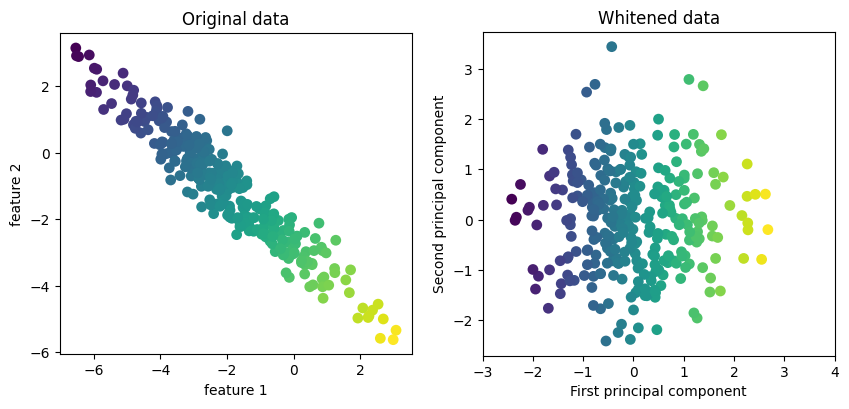

In [ ]:
mglearn.plots.plot_pca_whitening()

In [ ]:
# Implementing PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [ ]:
# Implementing knn on the pcaed data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.30


In [ ]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


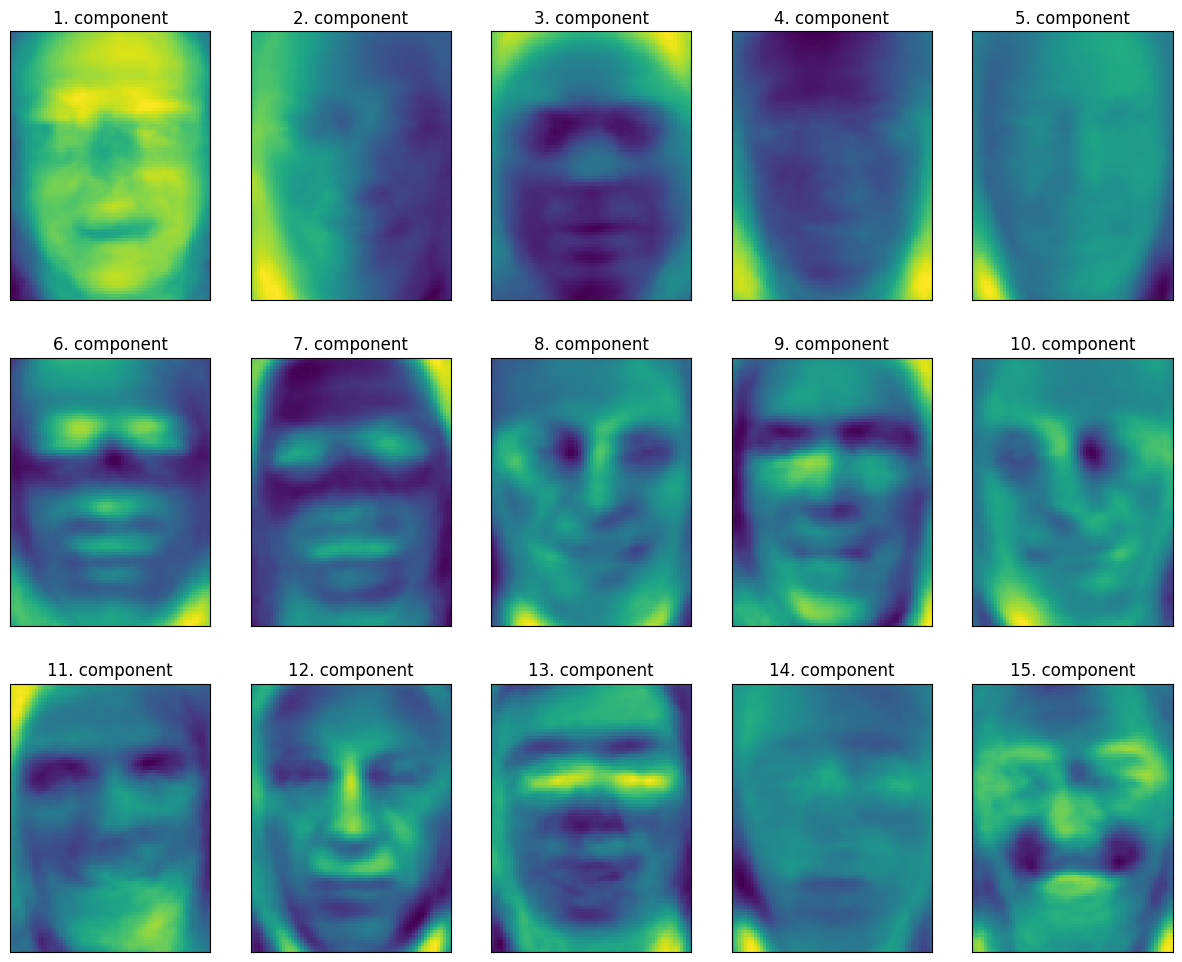

In [ ]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("{}. component".format((i + 1)))

In [ ]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

ValueError: n_components=500 must be between 0 and min(n_samples, n_features)=103 with svd_solver='covariance_eigh'

# Pages 236 bis 241

In [ ]:
cancer = load_breast_cancer()
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

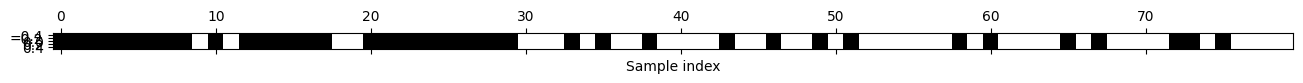

In [ ]:
 mask = select.get_support()
 print(mask)
 # visualize the mask -- black is True, white is False
 plt.matshow(mask.reshape(1, -1), cmap='gray_r')
 plt.xlabel("Sample index")

In [ ]:
 # transform test data
 X_test_selected = select.transform(X_test)
 lr = LogisticRegression()
 lr.fit(X_train, y_train)
 print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
 lr.fit(X_train_selected, y_train)
 print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.919
Score with only selected features: 0.909


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
 select = SelectFromModel(
 RandomForestClassifier(n_estimators=100, random_state=42),
 threshold="median")

In [ ]:
 select.fit(X_train, y_train)
 X_train_l1 = select.transform(X_train)
 print("X_train.shape: {}".format(X_train.shape))
 print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

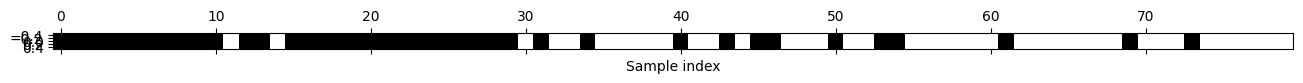

In [ ]:
 mask = select.get_support()
 # visualize the mask -- black is True, white is False
 plt.matshow(mask.reshape(1, -1), cmap='gray_r')
 plt.xlabel("Sample index")

In [ ]:
 X_test_l1 = select.transform(X_test)
 score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
 print("Test score: {:.3f}".format(score))

Test score: 0.930


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0, 'Sample index')

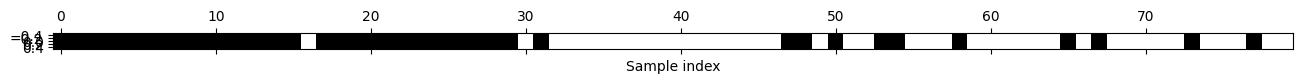

In [ ]:
 select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
 n_features_to_select=40)
 select.fit(X_train, y_train)
 # visualize the selected features:
 mask = select.get_support()
 plt.matshow(mask.reshape(1, -1), cmap='gray_r')
 plt.xlabel("Sample index")

In [ ]:
 X_train_rfe= select.transform(X_train)
 X_test_rfe= select.transform(X_test)
 score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
 print("Test score: {:.3f}".format(score))

Test score: 0.930


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


# Page 211 bis 219

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

X['income'] = y
print(X.shape)

# variable information
# print(adult.variables)
print(X.columns)  # Check the available column names

(48842, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [ ]:
# Select relevant columns (as in your original code)
data = X[['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'income']]

# Display the first few rows
display(data.head())

,age,workclass,education,sex,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


To check if the categorical parts of the data contain correct information, the `value_counts` method of a Pandas series is commonly used. to show us what the unique val
ues are and how often they appear

In [ ]:
print(data.sex.value_counts())

sex
Male      32650
Female    16192
Name: count, dtype: int64


In this section, the features of the data were checked after converting the categorical features to numerical values using the dummies method.The continuous features like age and hours-per-week were not touched,
while the categorical features were expanded into one new feature for each possible
value.

In [ ]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'sex_Female', 'sex_Male', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupat

In [ ]:
data_dummies.head()

,age,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,income_<=50K,income_<=50K.,income_>50K,income_>50K.
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,28,40,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encoding

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test score: 0.54


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
 # create a DataFrame with an integer feature and a categorical string feature
 demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
 display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [ ]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [ ]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False
